# Wafflemaker

In [1]:
%matplotlib inline
import pandas as pd
import wafflemaker

## An example

Inspiration from recreating a re-creation:
- https://github.com/hrbrmstr/waffle
- http://www.nytimes.com/2008/07/20/business/20debt.html

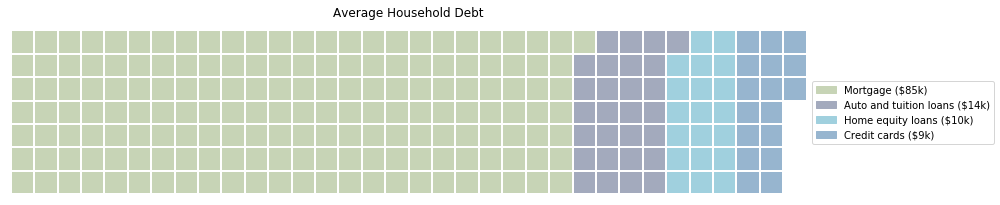

In [2]:
df = pd.DataFrame(dict(
    values=[84911, 14414, 10062, 8565],
    categories=[
        'Mortgage ($85k)', 
        'Auto and tuition loans ($14k)', 
        'Home equity loans ($10k)', 
        'Credit cards ($9k)'
    ],
    hues=["#c7d4b6", "#a3aabd", "#a0d0de", "#97b5cf"]
))

df['scaled_values'] = df['values'] / 500.

wafflemaker.waffle(
    nrows=7,
    values='scaled_values',
    labels='categories',
    hue='hues',
    scale_to_dims=False,
    data=df,
    grid_options=dict(linewidth=2),
    figure_options=dict(figsize=(14, 5)),
    title='Average Household Debt'
)

## Using icons instead of a grid

In [3]:
import matplotlib.font_manager as fm
import requests
import tempfile

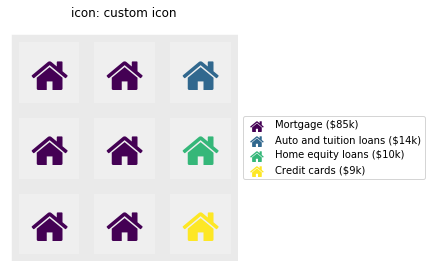

In [5]:
# get font and save to temp file
font_awesome_url = 'https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/fonts/fontawesome-webfont.ttf'
tf = tempfile.NamedTemporaryFile()
r = requests.get(font_awesome_url)
with open(tf.name, 'wb') as f:
    f.write(r.content)
    
# use font in waffle plot
prop = fm.FontProperties(fname=tf.name)

# build plot
wafflemaker.waffle(
        nrows=3, ncols=3,
        values='values', labels='categories', data=df,
        icon='\uf015',
        background_color='#efefef',
        icon_options=dict(fontproperties=prop, size=75),
        icon_legend_options=dict(size=25),
        grid_options=dict(color='#eaeaea', linewidth=15),
        title='icon: custom icon'
    )

# delete temporary font
tf.close()